In [1]:
import csv
import json
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon, Point
from scipy.interpolate import RBFInterpolator

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from pyslabgrid import polygon as poly
from pyslabgrid import reckoner as reck
from pyslabgrid import mat as mat
from pyslabgrid import slabgridding as slg

### Testing the interpolation. 

We carry out the spatial interpolation of the subduction (or more precisely, interface) geometry, using the radial basis function interpolation. It can be seen that the interpolation works well for the maximum depths that are relevant: 250 km for Hikurangi and 150 km for Puysegur

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};

<IPython.core.display.Javascript object>

In [3]:
def is_within_interfacezone(evlon, evlat, szone):
    # test the interpolatiors
    if szone=='hik':
        finterp = np.load('../1SubductionModel/hik_finterp.npy', allow_pickle=True)[()]
    elif szone=='puy':
        finterp = np.load('puy_finterp.npy', allow_pickle=True)[()]
        
    pbounds = finterp['pbounds']
    if pbounds.contains(Point(evlon, evlat)):
        return True
    return False

In [4]:
def makeplot(szone, maxdepth):
    X,Y,Z = slg.compute_slabgrids(szone, None, dx_km=11, doplot=False, clipzone=False)
    finterp_file = {'hik': 'finterp/hik_finterp.npy', 'puy': 'finterp/puy_finterp.npy'}
    finterp = np.load(finterp_file[szone], allow_pickle=True)[()]
    X = mat.flatten(X)
    Y = mat.flatten(Y)
    Z = mat.flatten(Z)
    XX,YY = [],[]
    
    for x,y,z in zip(X,Y,Z):
        if z>maxdepth:
            continue
        XX.append(x)
        YY.append(y)
        
    dep_finterp = finterp['depth']
    sdep = dep_finterp(np.transpose([XX,YY])).tolist()
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(7,7))

    subdmod =  mat.getdict('../data/subduction_model/subduction_model.mat')
    tX = mat.flatten(subdmod[szone]['lon'].tolist())
    tY = mat.flatten(subdmod[szone]['lat'].tolist())
    tZ = mat.flatten(subdmod[szone]['dep'].tolist())

    %matplotlib notebook
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
    ax.plot3D(XX, YY, sdep,'.', color='r');
    ax.plot3D(tX, tY, tZ,'.', color='b');
    ax.invert_zaxis()

<IPython.core.display.Javascript object>


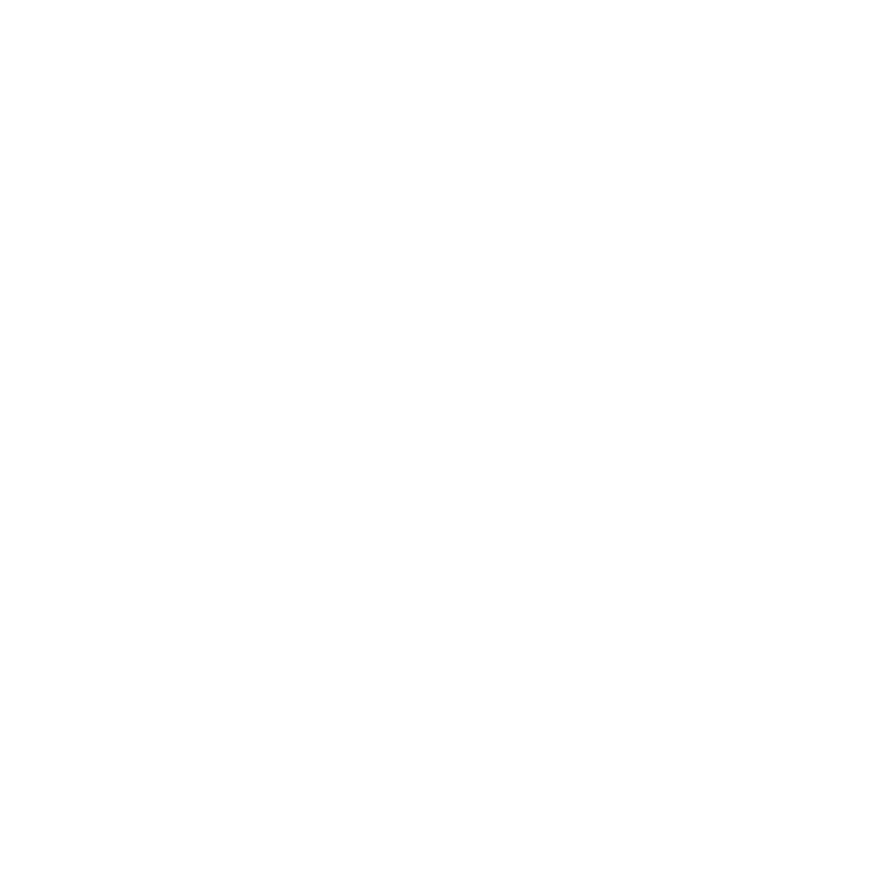

<IPython.core.display.Javascript object>


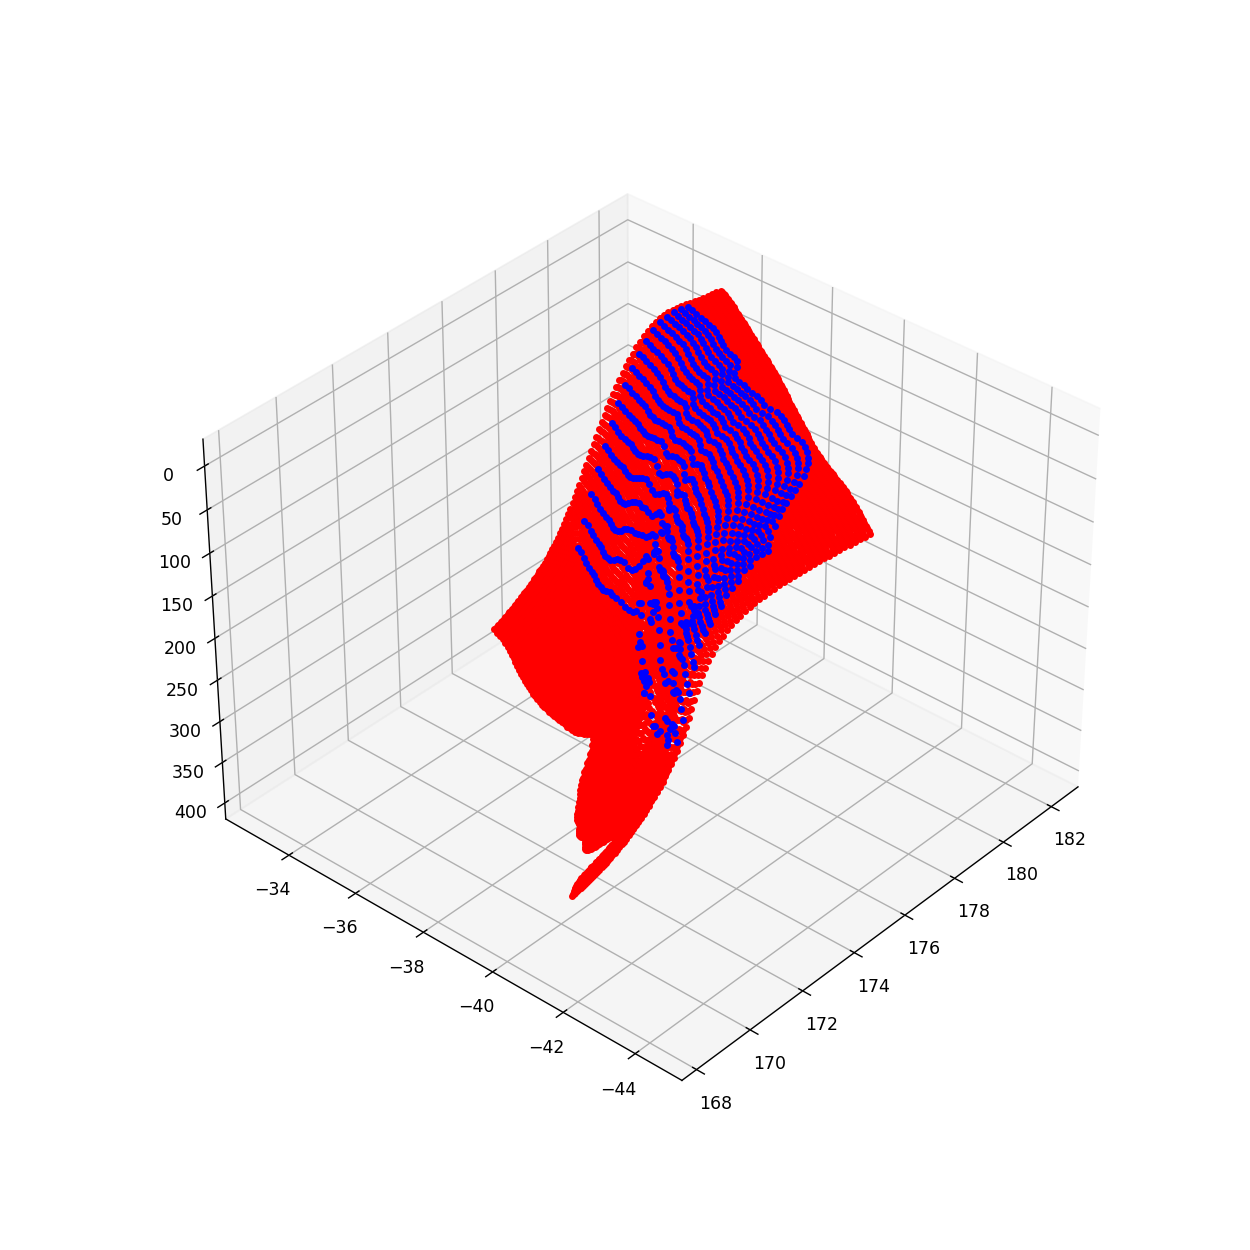

In [7]:
makeplot('hik', 1000)
plt.show()

<IPython.core.display.Javascript object>


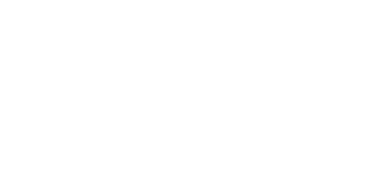

<IPython.core.display.Javascript object>


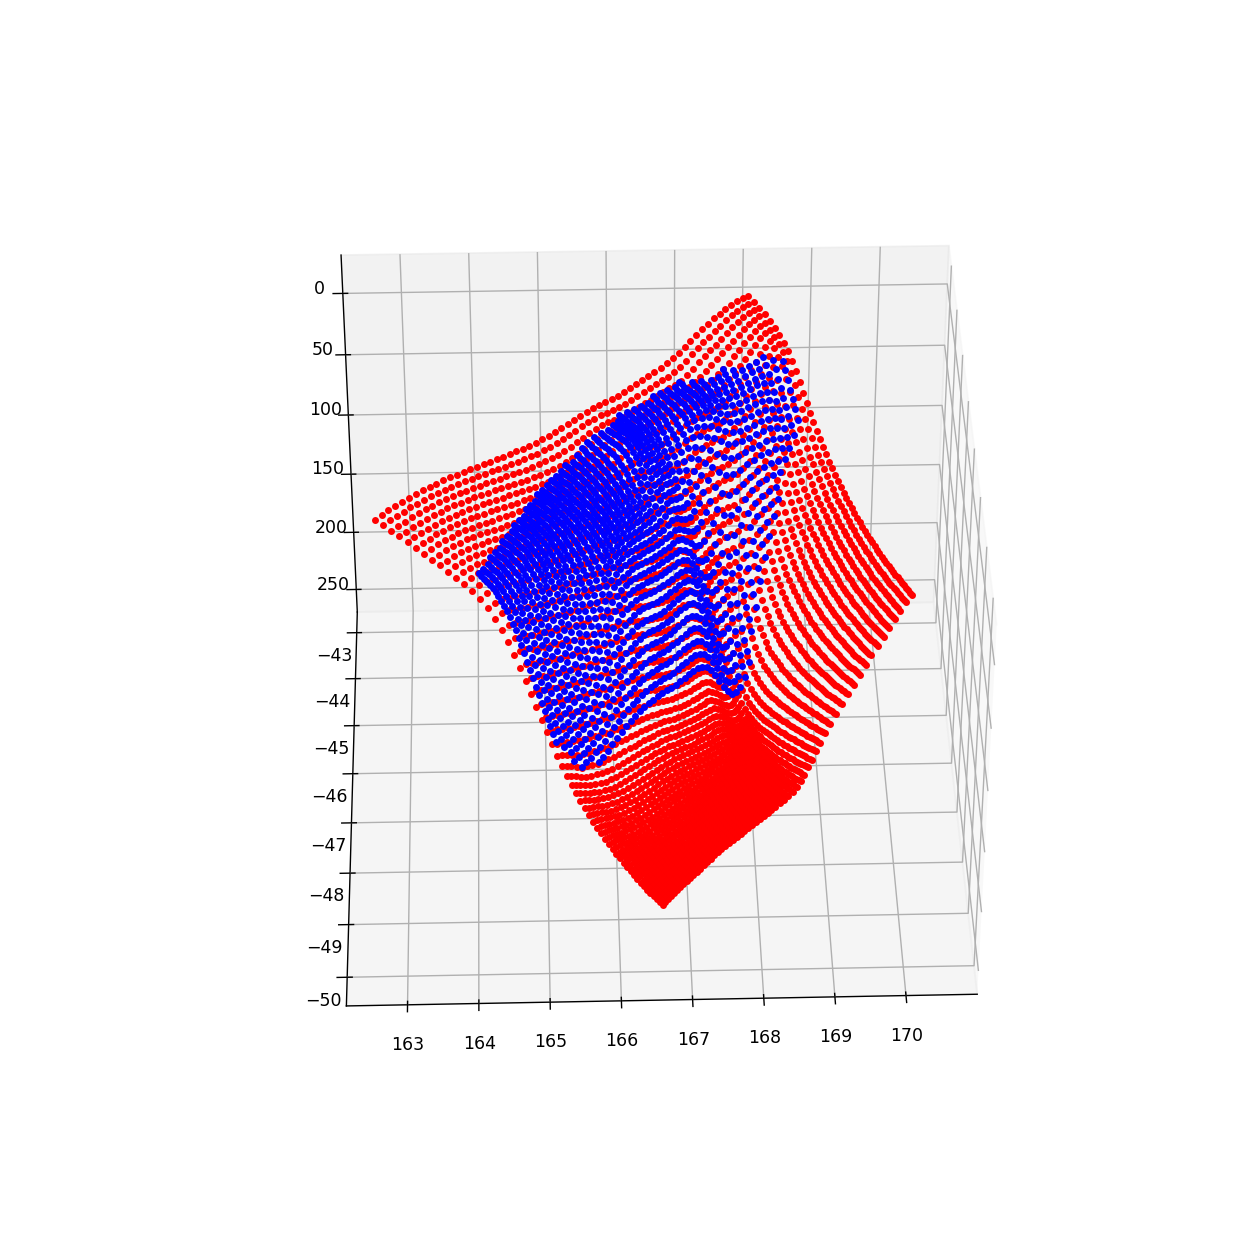

In [6]:
makeplot('puy', 300)